     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

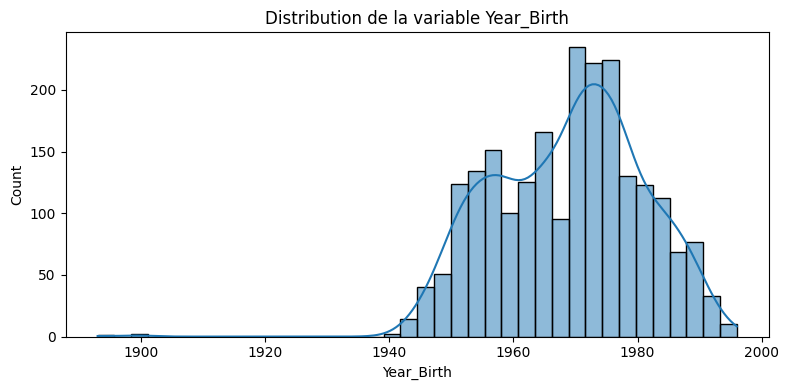

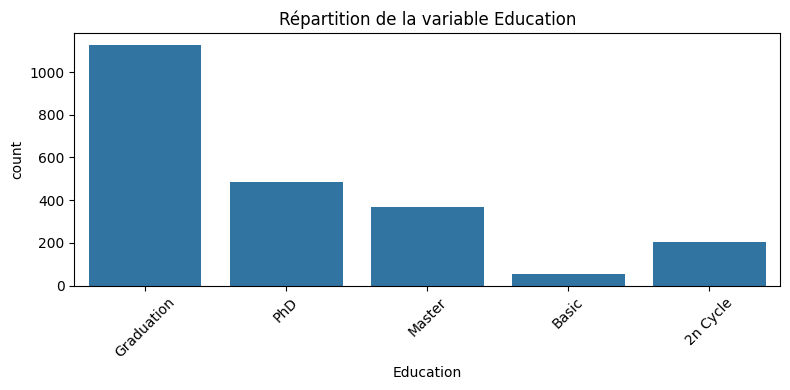

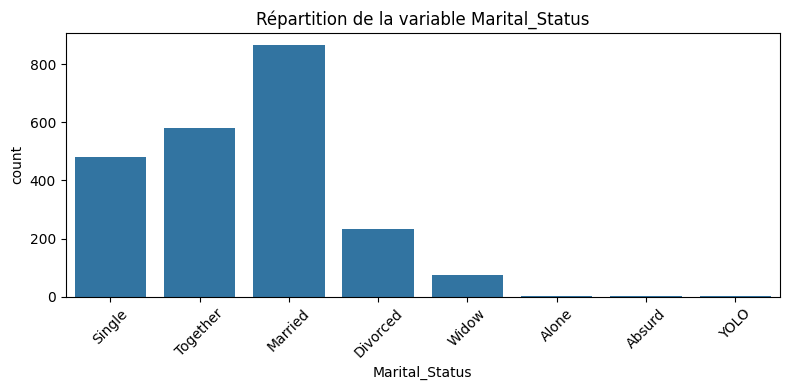

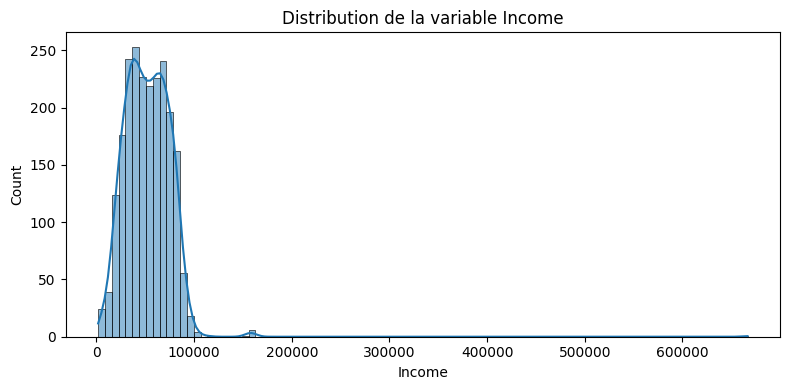

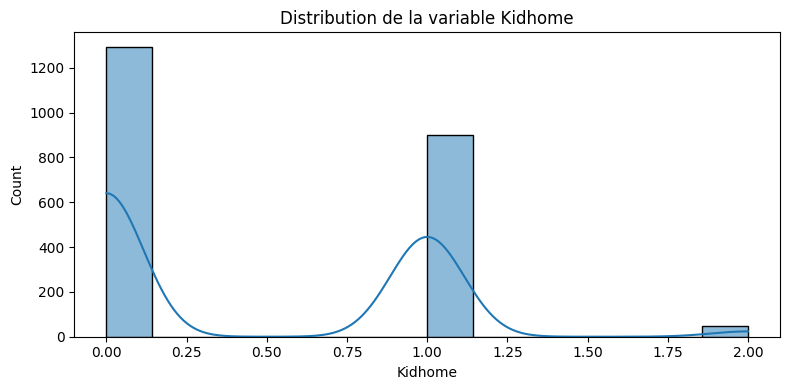

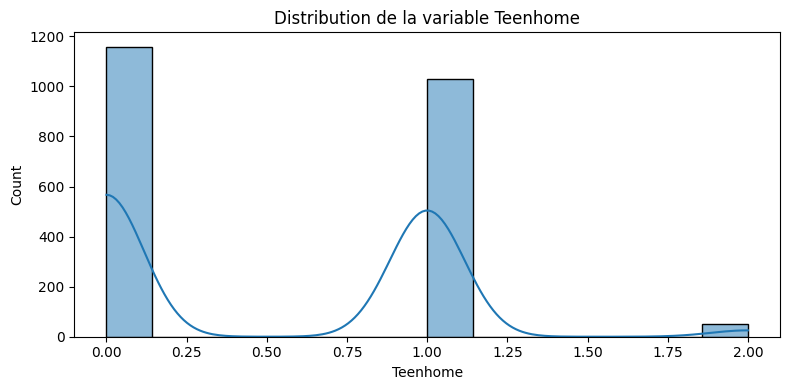

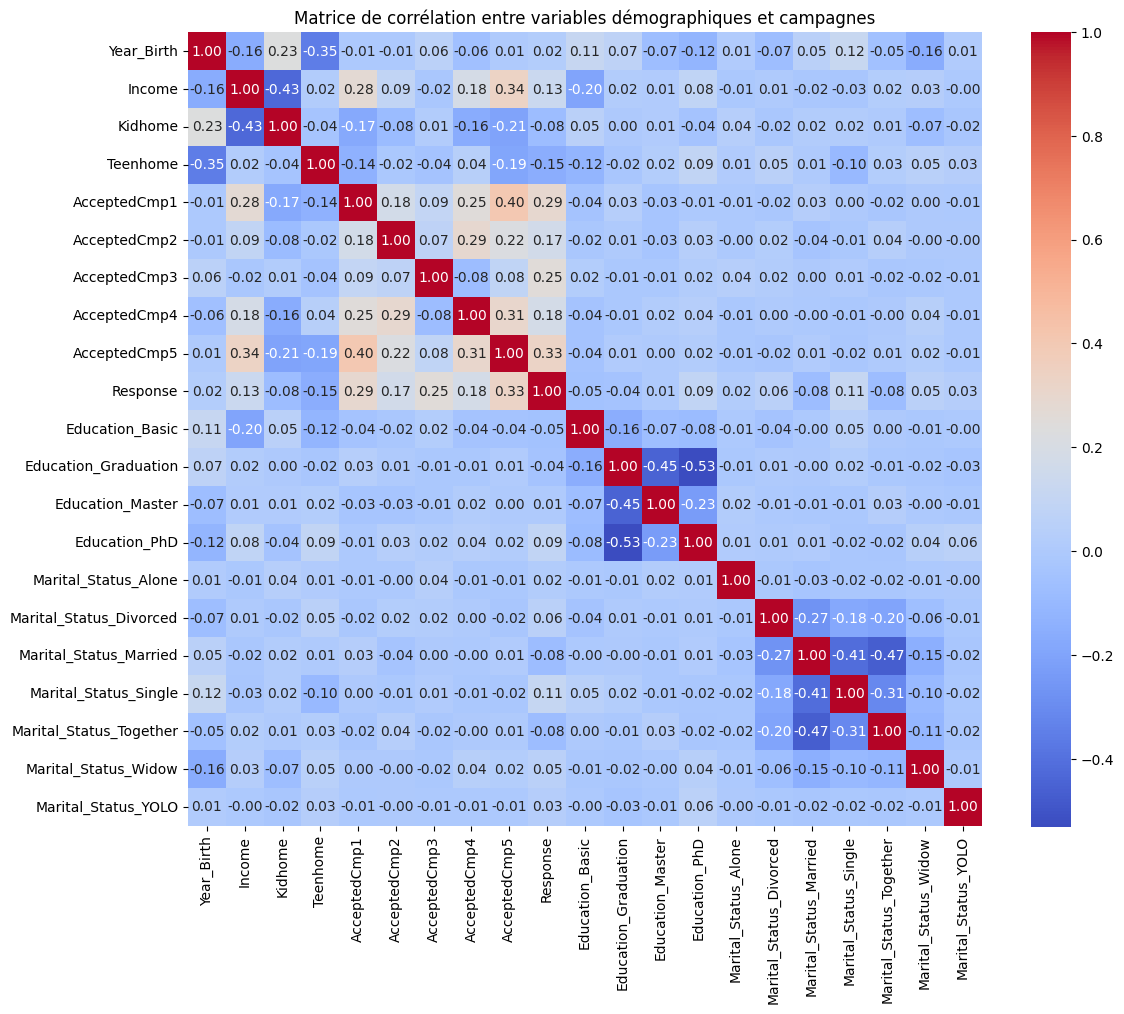

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Chargement du fichier CSV
df = pd.read_csv("Camp_Market_nettoye.csv", sep=';')

# Affichage des premières lignes pour vérifier la structure
print(df.head())

# Identification des variables démographiques
variables_demographiques = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome']
print("Variables démographiques :", variables_demographiques)

# Analyse exploratoire des variables démographiques
for var in variables_demographiques:
    plt.figure(figsize=(8, 4))
    if df[var].dtype == 'object':
        sns.countplot(data=df, x=var)
        plt.title(f"Répartition de la variable {var}")
        plt.xticks(rotation=45)
    else:
        sns.histplot(data=df, x=var, kde=True)
        plt.title(f"Distribution de la variable {var}")
    plt.tight_layout()
    plt.show()

# Préparation des données pour l'analyse de corrélation
# Ajout des variables d'historique de campagne
variables_campagne = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Sélection des colonnes pertinentes
colonnes_interet = variables_demographiques + variables_campagne
df_corr = df[colonnes_interet].copy()

# Encodage des variables catégorielles
df_corr_encoded = pd.get_dummies(df_corr, drop_first=True)

# Calcul de la matrice de corrélation
corr_matrix = df_corr_encoded.corr()

# Affichage de la heatmap des corrélations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation entre variables démographiques et campagnes")
plt.tight_layout()
plt.show()